In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("sales_data.csv")
df

,Date,Region,Product,Quantity Sold,Price per Unit,Discount,Revenue
0,2024-01-01,East,Product A,50,20,0.10,900.0
1,2024-01-01,West,Product B,30,15,0.05,427.5
2,2024-01-02,East,Product C,20,10,0.00,200.0
3,2024-01-02,North,Product A,100,20,0.15,1700.0
4,2024-01-03,South,Product B,60,15,0.10,810.0
5,2024-01-03,East,Product D,10,25,0.05,237.5
6,2024-01-04,West,Product A,80,20,0.10,1440.0
7,2024-01-04,North,Product C,40,10,0.00,400.0
8,2024-01-05,South,Product B,70,15,0.05,997.5
9,2024-01-05,West,Product D,90,25,0.10,2025.0


### Basic Data Exploration:

##### - What is the total quantity of each product sold across all regions?
##### - Calculate the total revenue for each region.
##### - Find the average price per unit for each product.


In [13]:
# What is the total quantity of each product sold across all regions?
total_quantity = df.groupby("Product").agg({"Quantity Sold":"sum"})
print(total_quantity)


# Calculate the total revenue for each region.
total_revenue = df.groupby("Region").agg({"Revenue":"sum"})
print(total_revenue)

# Find the average price per unit for each product.
avg_price = df.groupby("Product").agg({"Price per Unit":"mean"})
print(avg_price)

           Quantity Sold
Product                 
Product A            230
Product B            160
Product C             60
Product D            100
        Revenue
Region         
East     1337.5
North    2100.0
South    1807.5
West     3892.5
           Price per Unit
Product                  
Product A            20.0
Product B            15.0
Product C            10.0
Product D            25.0


### Data Filtering and Grouping:
##### - What is the total revenue generated from "Product A" across all regions?
##### - Which region had the highest total revenue on a given day (e.g., 2024-01-02)?

In [32]:
# What is the total revenue generated from "Product A" across all regions?
t_revenue = df[(df["Product"] == "Product A")].agg({"Revenue":"sum"})
print(t_revenue)

# Which region had the highest total revenue on a given day (e.g., 2024-01-02)?
filtered_df = df[df["Date"] == "2024-01-02"]

t_revenue = filtered_df.groupby("Region").agg({"Revenue": "sum"})
# print(t_revenue)
highest_revenue_region = t_revenue[t_revenue["Revenue"] == t_revenue["Revenue"].max()]

print(highest_revenue_region)

Revenue    4040.0
dtype: float64
        Revenue
Region         
North    1700.0


### Data Transformation:

##### - Calculate the effective revenue after applying the discount for each transaction.
##### - Add a new column for the profit margin, assuming a fixed cost of 60% of the price per unit.

In [46]:
# Calculate the effective revenue after applying the discount for each transaction
# Effective Revenue = Quantity Sold × (Price per Unit - Discounted Amount)
# Or, more commonly:
# Effective Revenue = Revenue − ( Revenue × Discount ) 

df["Effective Revenue"] = df["Revenue"] - (df["Revenue"] * df["Discount"])



# Add a new column for the profit margin, assuming a fixed cost of 60% of the price per unit.
# Profit Margin= (Profit/Revenue) ×100
# wher Profit = Revenue - Cost
Cost = df["Price per Unit"] * 0.60
Profit = df["Revenue"] - Cost
df["Profit Margin"] = ( Profit / df["Revenue"] ) *100
df

,Date,Region,Product,Quantity Sold,Price per Unit,Discount,Revenue,Effective Revenue,Profit Margin
0,2024-01-01,East,Product A,50,20,0.10,900.0,810.000,98.666667
1,2024-01-01,West,Product B,30,15,0.05,427.5,406.125,97.894737
2,2024-01-02,East,Product C,20,10,0.00,200.0,200.000,97.000000
3,2024-01-02,North,Product A,100,20,0.15,1700.0,1445.000,99.294118
4,2024-01-03,South,Product B,60,15,0.10,810.0,729.000,98.888889
5,2024-01-03,East,Product D,10,25,0.05,237.5,225.625,93.684211
6,2024-01-04,West,Product A,80,20,0.10,1440.0,1296.000,99.166667
7,2024-01-04,North,Product C,40,10,0.00,400.0,400.000,98.500000
8,2024-01-05,South,Product B,70,15,0.05,997.5,947.625,99.097744
9,2024-01-05,West,Product D,90,25,0.10,2025.0,1822.500,99.259259


### Visualization with Matplotlib & Seaborn:

##### - Plot the total revenue per region using a bar chart.
##### - Create a line plot of total sales quantity for each product over time.
##### - Plot the correlation between quantity sold and revenue using a scatter plot.

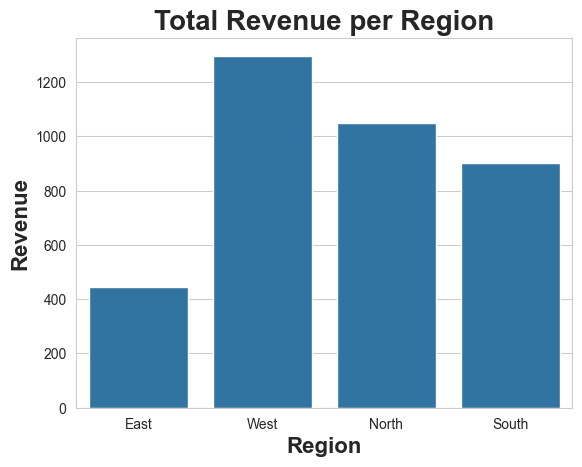

In [55]:
# Plot the total revenue per region using a bar chart.

sns.set_style(style = "whitegrid")
sns.barplot(data = df ,x ="Region" , y = "Revenue",errorbar = ("ci",0))
plt.title("Total Revenue per Region" , fontsize = 20 , fontweight = "bold")
plt.xlabel("Region", fontsize = 16 , fontweight = "bold")
plt.ylabel("Revenue", fontsize = 16 , fontweight = "bold")
plt.show()

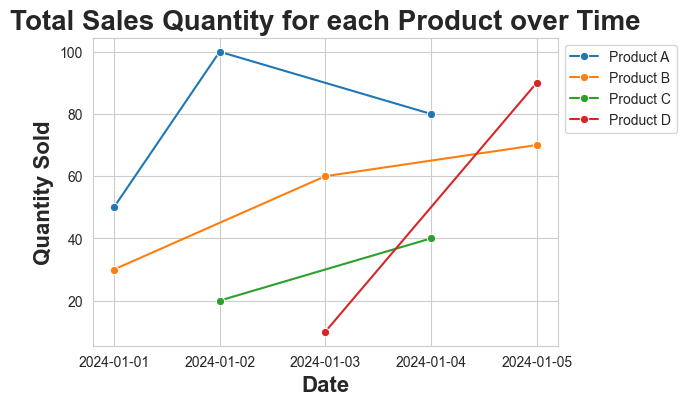

In [61]:
# Create a line plot of total sales quantity for each product over time.

plt.figure(figsize =[6,4])
sns.lineplot(data = df ,x ="Date" , y = "Quantity Sold" , hue = "Product",marker = "o")
plt.title("Total Sales Quantity for each Product over Time" , fontsize = 20 , fontweight = "bold")
plt.xlabel("Date", fontsize = 16 , fontweight = "bold")
plt.ylabel("Quantity Sold", fontsize = 16 , fontweight = "bold")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

0.946811750433627


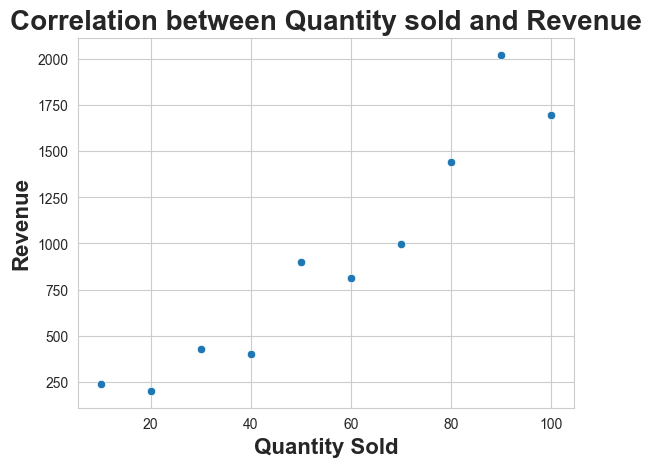

In [120]:
# Plot the correlation between quantity sold and revenue using a scatter plot.

correlation_quantity_sold_revenue = df["Quantity Sold"].corr(df["Revenue"])
print(correlation_quantity_sold_revenue)
# 0.946 - this indicates that more quantity sold are likely contributing to increased revenue. 

sns.scatterplot(data = df ,x ="Quantity Sold" , y = "Revenue")
plt.title("Correlation between Quantity sold and Revenue" , fontsize = 20 , fontweight = "bold")
plt.xlabel("Quantity Sold", fontsize = 16 , fontweight = "bold")
plt.ylabel("Revenue", fontsize = 16 , fontweight = "bold")
plt.show()

### Advanced Analysis:

##### - Which product contributes the most to the overall revenue?
##### - Create a heatmap to visualize the correlation between Quantity Sold, Price per Unit, Discount, and Revenue.
##### - Analyze how discounts affect revenue. Are higher discounts leading to higher sales quantities?

           Revenue
Product           
Product A   4040.0
Product B   2235.0
Product C    600.0
Product D   2262.5


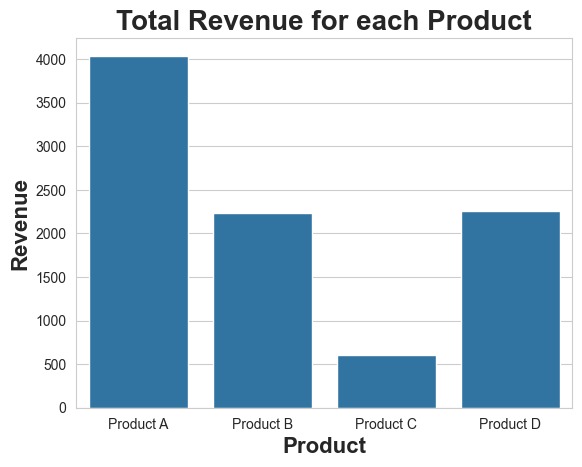

In [99]:
# Which product contributes the most to the overall revenue?

rp = df.groupby("Product").agg({"Revenue" : "sum"})
print (rp)
sns.barplot(data = rp ,x = "Product" ,y = "Revenue")
plt.title("Total Revenue for each Product" ,fontsize = 20, fontweight = "bold")
plt.xlabel("Product", fontsize = 16 , fontweight = "bold")
plt.ylabel("Revenue", fontsize = 16 , fontweight = "bold")
plt.show()

# from the below bar we analysed that product A contributes the most revenue

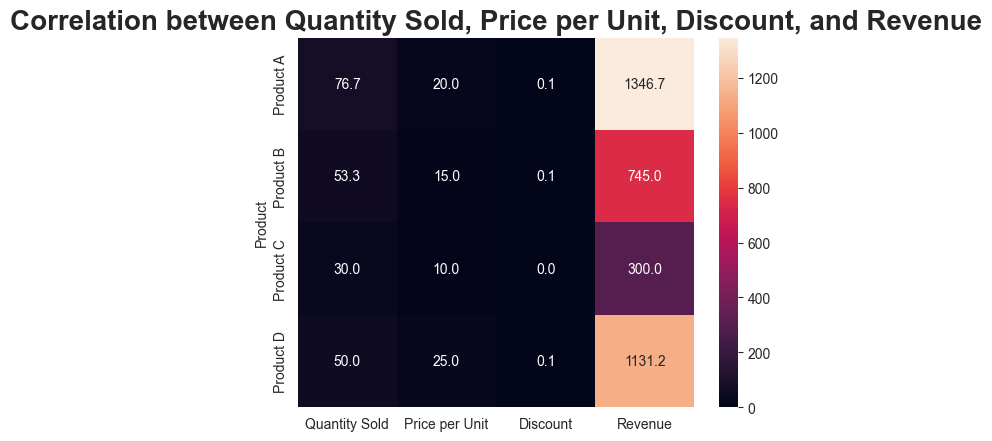

In [102]:
# Create a heatmap to visualize the correlation between Quantity Sold, 
# Price per Unit, Discount, and Revenue by product.

gp = df.groupby("Product").agg(
    {"Quantity Sold":"mean","Price per Unit":"mean","Discount":"mean","Revenue":"mean"})

sns.heatmap(data = gp , annot = True, fmt = '.1f')

plt.title("Correlation between Quantity Sold, Price per Unit, Discount, and Revenue" ,
          fontsize = 20 , fontweight = "bold")
plt.show()

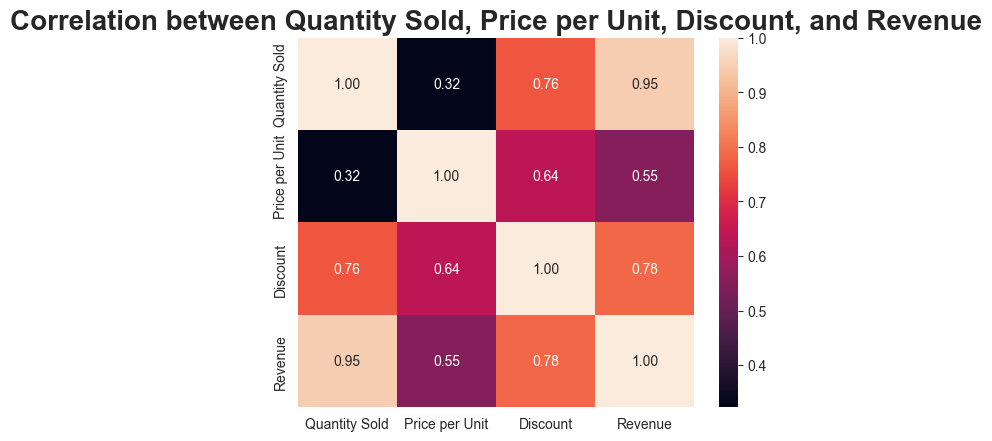

In [103]:
# Create a heatmap to visualize the correlation between Quantity Sold, Price per Unit, Discount, and Revenue.

corr = df[["Quantity Sold", "Price per Unit", "Discount", "Revenue"]].corr()

sns.heatmap(data = corr, annot = True,  fmt = '.2f') 
plt.title("Correlation between Quantity Sold, Price per Unit, Discount, and Revenue",
          fontsize = 20, fontweight = "bold")
plt.show()

### Analyze how discounts affect revenue. Are higher discounts leading to higher sales quantities?

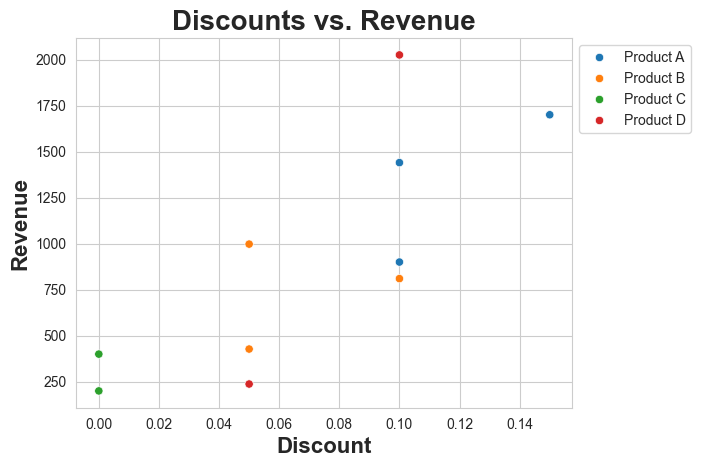

In [116]:
# Scatter plot of Discounts vs. Revenue
sns.scatterplot(data = df, x = "Discount", y = "Revenue", hue = "Product")
plt.title("Discounts vs. Revenue", fontsize = 20, fontweight = "bold")
plt.xlabel("Discount", fontsize = 16, fontweight = "bold")
plt.ylabel("Revenue", fontsize = 16, fontweight = "bold")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

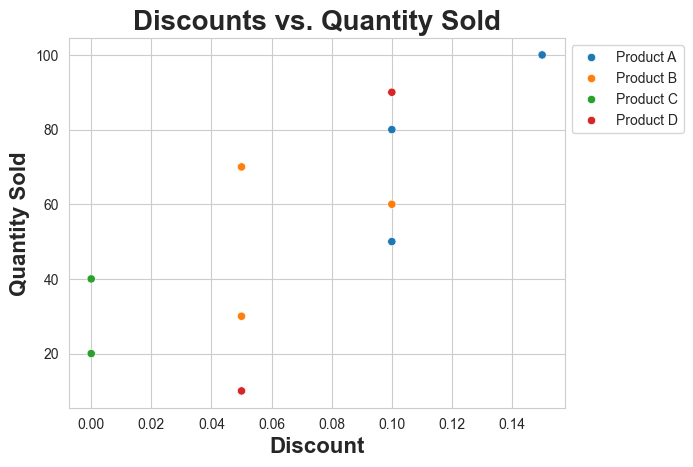

In [117]:
# Scatter plot of Discounts vs. Quantity Sold
sns.scatterplot(data = df, x = "Discount", y = "Quantity Sold", hue = "Product")
plt.title("Discounts vs. Quantity Sold", fontsize = 20, fontweight = "bold")
plt.xlabel("Discount", fontsize = 16, fontweight = "bold")
plt.ylabel("Quantity Sold", fontsize = 16, fontweight = "bold")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

In [109]:
# Calculate correlations
correlation_discount_revenue = df["Discount"].corr(df["Revenue"])
correlation_discount_quantity_sold = df["Discount"].corr(df["Quantity Sold"])

print(f"Correlation between Discount and Revenue: {correlation_discount_revenue:.2f}")
print(f"Correlation between Discount and Quantity Sold: {correlation_discount_quantity_sold:.2f}")

Correlation between Discount and Revenue: 0.78
Correlation between Discount and Quantity Sold: 0.76


In [119]:
### Analyze how discounts affect revenue. Are higher discounts leading to higher sales quantities?

#  - Correlation between Discount and Revenue: 0.78
# This positive correlation indicates a strong relationship between discounts and revenue. 
# As discounts increase, revenue tends to increase as well. 
# This suggests that offering higher discounts is associated with higher revenue.

#  - Correlation between Discount and Quantity Sold: 0.76
# This positive correlation indicates a strong relationship between discounts and quantity sold.
# As discounts increase, the quantity sold also tends to increase. 
# This suggests that higher discounts are associated with higher sales quantities.

#  - Discounts and Revenue: The strong positive correlation (0.78) implies that discounts are likely 
# contributing to increased revenue. Higher discounts may attract more customers or increase sales volume, 
# leading to higher revenue.
    
#  - Discounts and Quantity Sold: The positive correlation (0.76) shows that higher discounts tend to
# lead to higher quantities sold. This suggests that customers are more inclined to purchase larger 
# quantities when offered greater discounts.